In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
train_data = pd.read_csv('../Dataset/Data_Train.csv')
test_data = pd.read_csv('../Dataset/Test_set.csv') 

In [169]:
train_data.shape,test_data.shape

((10683, 11), (2671, 10))

In [170]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [171]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [172]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [173]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [174]:
train_data.dropna(inplace=True)

In [175]:
# Checking if there are any Duplicate values
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [176]:
# Drop duplicates value
train_data.drop_duplicates(keep='first',inplace=True)

train_data.drop(["Additional_Info"], axis = 1, inplace = True)
test_data.drop(["Additional_Info"], axis = 1, inplace = True)

train_data.drop(["Dep_Time"], axis = 1, inplace = True)
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

train_data.drop(["Arrival_Time"], axis = 1, inplace = True)
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

train_data.drop(["Route"], axis = 1, inplace = True)
test_data.drop(["Route"], axis = 1, inplace = True)

In [177]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302


In [178]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,10h 55m,1 stop
1,IndiGo,12/05/2019,Kolkata,Banglore,4h,1 stop
2,Jet Airways,21/05/2019,Delhi,Cochin,23h 45m,1 stop
3,Multiple carriers,21/05/2019,Delhi,Cochin,13h,1 stop
4,Air Asia,24/06/2019,Banglore,Delhi,2h 50m,non-stop


In [179]:
# Duration convert hours in min.
train_data['Duration']=  train_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data['Duration']=  test_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [180]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,170,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,445,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,1140,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,325,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,285,1 stop,13302


In [181]:
train_data["Journey_day"] = train_data['Date_of_Journey'].str.split('/').str[0].astype(int)
train_data["Journey_month"] = train_data['Date_of_Journey'].str.split('/').str[1].astype(int)
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

test_data["Journey_day"] = test_data['Date_of_Journey'].str.split('/').str[0].astype(int)
test_data["Journey_month"] = test_data['Date_of_Journey'].str.split('/').str[1].astype(int)
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [182]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3


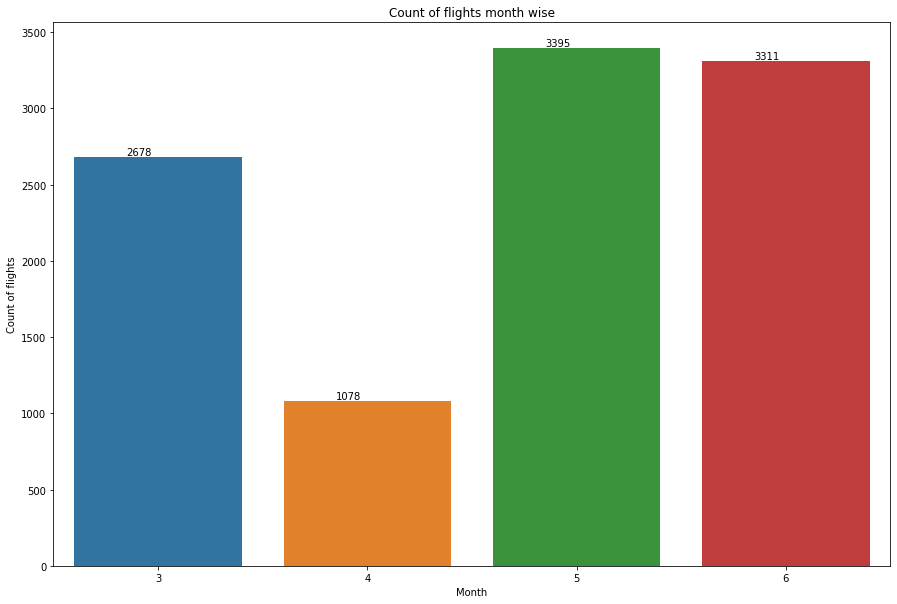

In [183]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [184]:
# Total_Stops
train_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
test_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [185]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3
1,Air India,Kolkata,Banglore,445,2,7662,1,5
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3


In [186]:
train_data["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

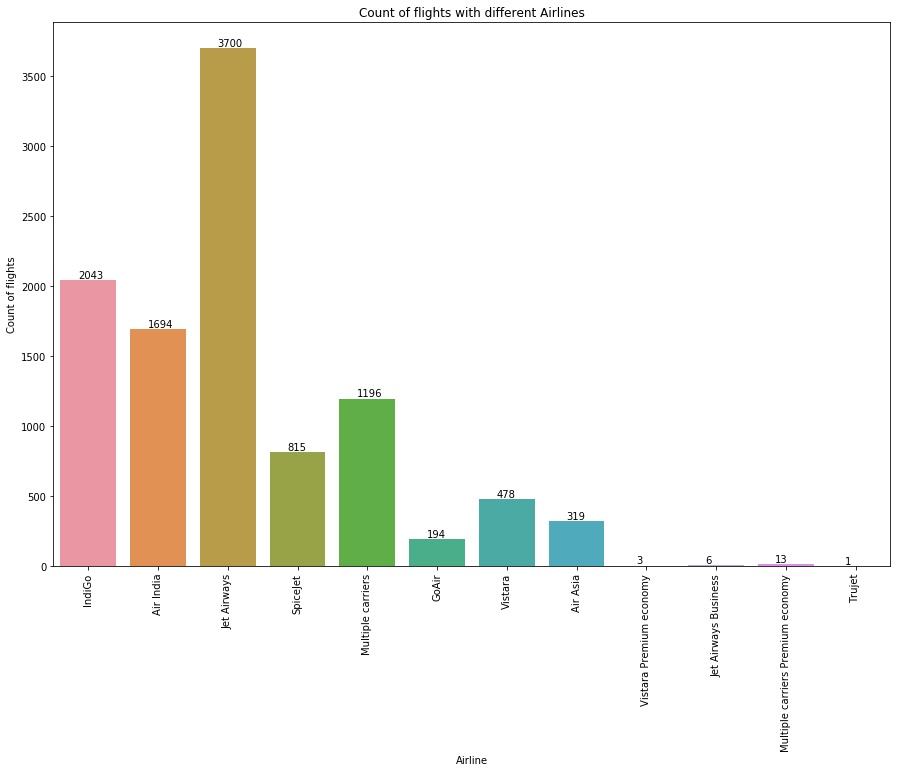

In [187]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

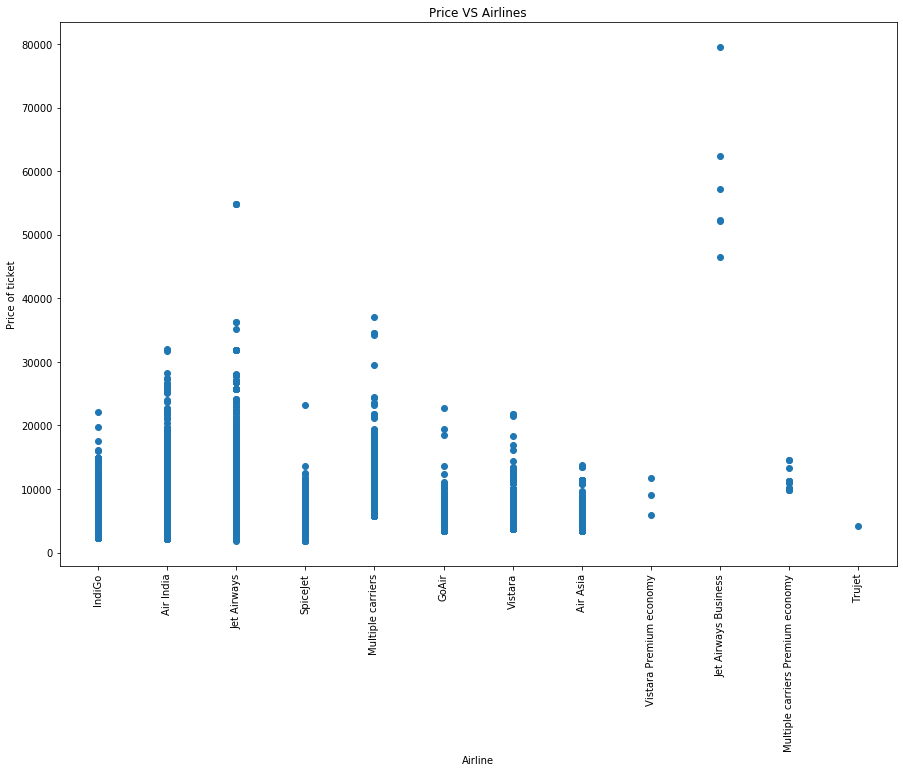

In [188]:

plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [189]:
# Airline
train_data["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

test_data["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

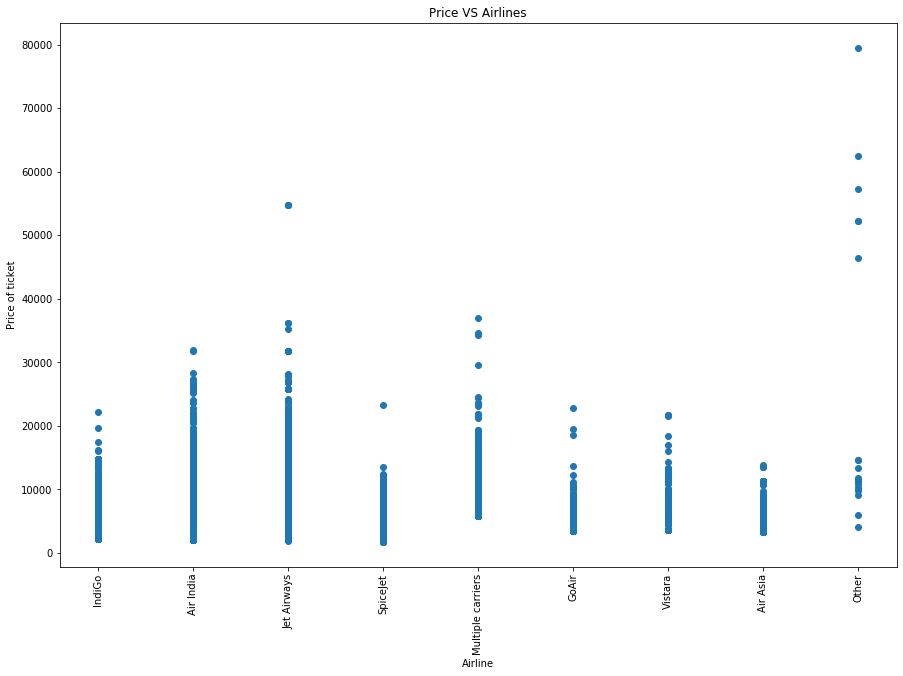

In [190]:

plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [198]:
data = train_data.drop(["Price"], axis=1)

In [204]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_data.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_data.select_dtypes(include=['int64', 'float','int32'])

In [205]:
train_categorical_data.head(100)

,Airline,Source,Destination
0,IndiGo,Banglore,New Delhi
1,Air India,Kolkata,Banglore
2,Jet Airways,Delhi,Cochin
3,IndiGo,Kolkata,Banglore
4,IndiGo,Banglore,New Delhi
...,...,...,...
95,IndiGo,Chennai,Kolkata
96,SpiceJet,Banglore,Delhi
97,Jet Airways,Banglore,Delhi
98,Jet Airways,Mumbai,Hyderabad


In [206]:
train_numerical_data.head()

,Duration,Total_Stops,Journey_day,Journey_month
0,170,0,24,3
1,445,2,1,5
2,1140,2,9,6
3,325,1,12,5
4,285,1,1,3


In [207]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [208]:
train_categorical_data.head(100)

,Airline,Source,Destination
0,3,0,5
1,1,3,0
2,4,2,1
3,3,3,0
4,3,0,5
...,...,...,...
95,3,1,4
96,7,0,2
97,4,0,2
98,4,4,3


In [162]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y=train_data['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)

In [152]:
X.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month
0,3,0,5,170,0,24,3
1,1,3,0,445,2,1,5
2,4,2,1,1140,2,9,6
3,3,3,0,325,1,12,5
4,3,0,5,285,1,1,3


In [153]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import ExtraTreesRegressor

In [155]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [156]:
print(model.feature_importances_)

[0.18543981 0.02775407 0.05142732 0.25849698 0.26679894 0.15370224
 0.05638064]


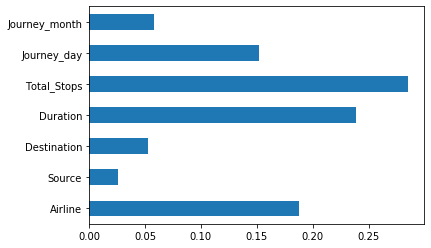

In [88]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [89]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [90]:
tuned_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_regressor = RandomizedSearchCV(
    RandomForestRegressor(),
    tuned_params,
    n_iter = 20,
    scoring = 'neg_mean_absolute_error',
    cv = 5,
    verbose=2,
    n_jobs = 1
)

random_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4 .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, total=   3.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4 .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, total=   3.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4 .......
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, total=   3.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4 .......
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, total=   3.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4 .......
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, total=   3.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1 .......
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, total=   1.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1 .......
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, total=   1.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1 .......
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, total=   1.0s
[CV] n_estimators=100

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, total=   2.7s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2 .......
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, total=   2.8s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2 .......
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, total=   2.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2 .......
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, total=   3.5s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4 ......
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, total=   0.9s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4 ......
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, total=   0.9s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4 ......
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, total=   0.8s
[CV] n_estimators=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [91]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [95]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [96]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1605.8821342795381
Mean absolute % error:  11
R-squared:  0.8808842968479283


In [97]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  2177.021815246185
Mean absolute % error:  15
R-squared:  0.7717984702633078


/home/user/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


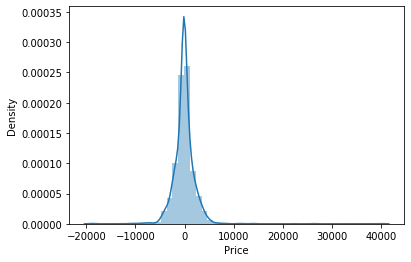

In [98]:
sns.distplot(y_test-y_test_pred)

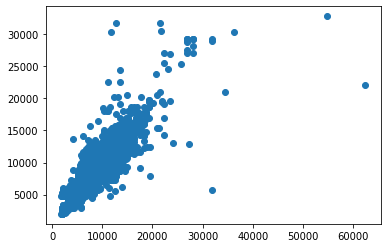

In [99]:
plt.scatter(y_test,y_test_pred)

In [100]:
import pickle5 as pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_regressor, file)